<a href="https://colab.research.google.com/github/PedroDominguezUTEC/ai-practicas/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


cuda0 = torch.device('cuda:0')


cuda:0


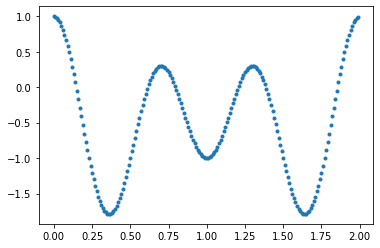

In [ ]:
n = 2000
x = np.arange(0,2,0.01)
#y = [np.sin(i*np.pi )  +  np.random.normal(0,0.1) for i in x]

y = [ (np.cos(i*np.pi*3 ))  -  (np.sin(i*np.pi ))**2   for i in x]

plt.plot(x,y, '.')
#######################################
x = x.reshape(200,1)
y = (np.array(y)).reshape(200,1)
x = torch.from_numpy(x).float() 
y = torch.from_numpy(y).float() 



device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

#x.cuda()
#y.cuda()




In [ ]:
class MLP(torch.nn.Module):
        def __init__(self, n ):
            super(MLP, self).__init__()
            self.layers = nn.Sequential(torch.nn.Linear(1,n),
                                        nn.Sigmoid(),
                                        torch.nn.Linear(n,1),
                                        nn.Tanh())  
            
        def forward(self, x):
            output = self.layers(x)
            return output


In [ ]:
model1 = MLP(10).to(device)
model2 = MLP(15).to(device)
model3 = MLP(20).to(device)
model4 = MLP(25).to(device)
model5 = MLP(30).to(device)
f_loss = torch.nn.MSELoss()

optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.01)
optimizer2 = torch.optim.Adam(model2.parameters(), lr = 0.01)
optimizer3 = torch.optim.Adam(model3.parameters(), lr = 0.01)
optimizer4 = torch.optim.Adam(model4.parameters(), lr = 0.01)
optimizer5 = torch.optim.Adam(model5.parameters(), lr = 0.01)




In [ ]:
def train(model, funcion, optimizer,epochs, x_train, y_train):

  for epoch in range(epochs):
    x_train = x_train.to(device)
    y_pred =   model(x_train)
    y_train = y_train.to(device) 
    loss = funcion(y_pred,y_train)
    if (epoch%500==0):
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


In [ ]:
train(model1,f_loss, optimizer1, 3000, x,y)
train(model2,f_loss, optimizer2, 3000, x,y)
train(model3,f_loss, optimizer3, 3000, x,y)
train(model4,f_loss, optimizer4, 3000, x,y)
train(model5,f_loss, optimizer5, 3000, x,y)



Epoch 0: train loss: 1.080061674118042
Epoch 500: train loss: 0.6223170161247253
Epoch 1000: train loss: 0.579862117767334
Epoch 1500: train loss: 0.5034032464027405
Epoch 2000: train loss: 0.43763434886932373
Epoch 2500: train loss: 0.3575783967971802
Epoch 0: train loss: 0.6249468326568604
Epoch 500: train loss: 0.3846936821937561
Epoch 1000: train loss: 0.15364031493663788
Epoch 1500: train loss: 0.09737578779459
Epoch 2000: train loss: 0.0948040634393692
Epoch 2500: train loss: 0.09340821206569672
Epoch 0: train loss: 0.687881350517273
Epoch 500: train loss: 0.5328927636146545
Epoch 1000: train loss: 0.38243240118026733
Epoch 1500: train loss: 0.2583009600639343
Epoch 2000: train loss: 0.10004990547895432
Epoch 2500: train loss: 0.09225267916917801
Epoch 0: train loss: 0.859017550945282
Epoch 500: train loss: 0.5182498097419739
Epoch 1000: train loss: 0.42022430896759033
Epoch 1500: train loss: 0.3436254858970642
Epoch 2000: train loss: 0.205557718873024
Epoch 2500: train loss: 0.0

In [ ]:
def figura(modelo,i):
  f = plt.figure(figsize=(5,20))
  with torch.no_grad():
    x = torch.FloatTensor(np.arange(0,2,0.01)).unsqueeze(1).to(device)
    y_pred = modelo(x)
    x = x.cpu()
    y_pred = y_pred.cpu()
    ax2 = plt.subplot(5,1,i)
    plt.plot(x,y_pred)
    plt.plot(x,y)



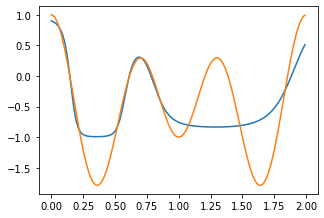

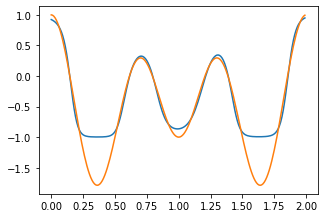

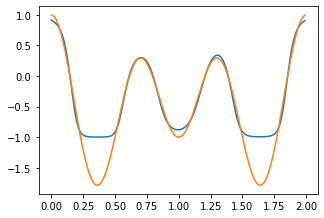

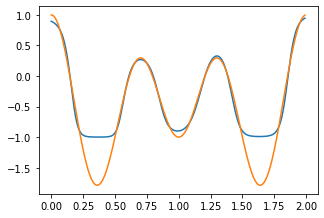

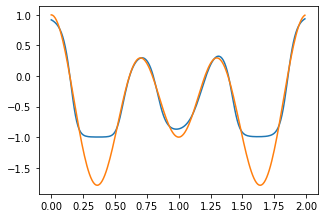

In [ ]:
figura(model1,1)
figura(model2,2)
figura(model3,3)
figura(model4,4)
figura(model5,5)
plt.show()


# MLP en pythor